# Logistic Regression Project 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [5]:
mydata = pd.read_csv("h1n1.csv")

In [6]:
mydata

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


# Deriving information about the imported dataset

In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [9]:
mydata.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [10]:
mydata.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# Performing Correlation

In [77]:
mydata.corr()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.016631,0.006403,-0.006674,0.008845,-0.009047,0.011177,0.002800,0.007624,0.002583,...,-0.000725,0.006105,-0.002858,-0.006891,-0.005696,-0.010117,0.005553,0.000940,-0.001413,-0.002259
h1n1_worry,0.016631,1.000000,0.067708,0.086667,0.235825,0.158519,0.291861,0.262741,0.251400,0.248624,...,-0.136624,-0.137625,0.051426,-0.037082,-0.003499,0.062925,0.001747,-0.012057,0.052454,0.123749
h1n1_awareness,0.006403,0.067708,1.000000,-0.008385,0.081560,0.039462,0.091825,-0.039311,-0.064719,0.091177,...,0.155252,-0.085762,-0.056530,-0.121610,-0.128330,-0.134732,-0.058835,0.017393,0.055798,0.119066
antiviral_medication,-0.006674,0.086667,-0.008385,1.000000,0.042370,0.139891,0.059896,0.103289,0.119942,0.065702,...,-0.116866,-0.007751,0.073487,0.017938,0.070956,0.012946,0.014957,0.042078,0.081887,0.037102
contact_avoidance,0.008845,0.235825,0.081560,0.042370,1.000000,0.061107,0.330723,0.226582,0.220244,0.327817,...,0.001415,-0.124002,0.002336,-0.058514,-0.039225,0.019824,-0.027234,0.021782,0.044993,0.043180
bought_face_mask,-0.009047,0.158519,0.039462,0.139891,0.061107,1.000000,0.077832,0.180412,0.163140,0.107287,...,-0.084744,-0.049900,0.048533,0.008591,0.052147,0.036513,-0.004720,0.012307,0.003426,0.074043
wash_hands_frequently,0.011177,0.291861,0.091825,0.059896,0.330723,0.077832,1.000000,0.190849,0.188182,0.361830,...,-0.068319,-0.168613,0.015471,-0.048194,-0.024556,0.001906,-0.014967,0.012608,0.044007,0.074877
avoid_large_gatherings,0.002800,0.262741,-0.039311,0.103289,0.226582,0.180412,0.190849,1.000000,0.587770,0.247922,...,-0.119171,-0.053471,0.024690,0.024706,0.051420,0.142206,0.043303,-0.029735,-0.010402,0.020875
reduced_outside_home_cont,0.007624,0.251400,-0.064719,0.119942,0.220244,0.163140,0.188182,0.587770,1.000000,0.260977,...,-0.138452,-0.041053,0.050953,0.029466,0.071108,0.152284,0.032932,-0.024624,-0.009629,0.018666
avoid_touch_face,0.002583,0.248624,0.091177,0.065702,0.327817,0.107287,0.361830,0.247922,0.260977,1.000000,...,-0.058797,-0.175299,0.001703,-0.036533,-0.023357,0.024746,0.007755,0.001918,0.024492,0.072091


# Replacing the null values with zero

In [12]:
col_to_zero=['h1n1_worry','h1n1_awareness','antiviral_medication','contact_avoidance','bought_face_mask',
   'wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face',
           'dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','chronic_medic_condition','cont_child_undr_6_mnths',
            'is_health_worker','is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc','is_seas_vacc_effective',
             'is_seas_risky','sick_from_seas_vacc','no_of_adults','no_of_children']

In [13]:
mydata[col_to_zero]=mydata[col_to_zero].fillna(0)

In [14]:
mydata.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths          0
is_health_worker                 0
has_health_insur             12274
is_h1n1_vacc_effective           0
is_h1n1_risky                    0
sick_from_h1n1_vacc              0
is_seas_vacc_effective           0
is_seas_risky                    0
sick_from_seas_vacc              0
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
# Since the has_health_insur column has about 45% null values we can drop that column

In [16]:
mydata=mydata.drop(["has_health_insur"],axis=1)

# Dropping null values in object type variables

In [18]:
mydata.dropna(inplace=True,axis=0)

In [19]:
mydata.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

# Labeling the Character datatype to Numeric datatype

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
LE=LabelEncoder()

In [23]:
mydata["age_bracket"]=LE.fit_transform(mydata.age_bracket)
mydata["qualification"]=LE.fit_transform(mydata.qualification)
mydata["race"]=LE.fit_transform(mydata.race)
mydata["sex"]=LE.fit_transform(mydata.sex)
mydata["income_level"]=LE.fit_transform(mydata.income_level)
mydata["marital_status"]=LE.fit_transform(mydata.marital_status)
mydata["housing_status"]=LE.fit_transform(mydata.housing_status)
mydata["employment"]=LE.fit_transform(mydata.employment)
mydata["census_msa"]=LE.fit_transform(mydata.census_msa)

# Performing Graphs for Visualization

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

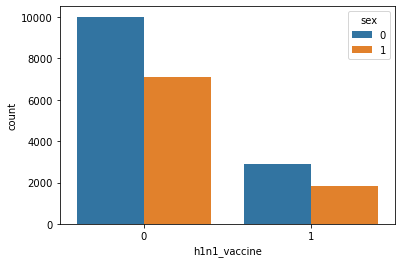

In [25]:
sns.countplot(x="h1n1_vaccine",data=mydata,hue='sex')

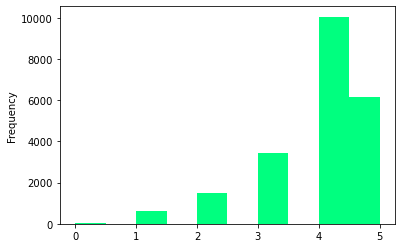

In [26]:
mydata.is_h1n1_vacc_effective.plot.hist(color="Springgreen");

Text(0.5, 1.0, 'Age wise Gender distribution chart')

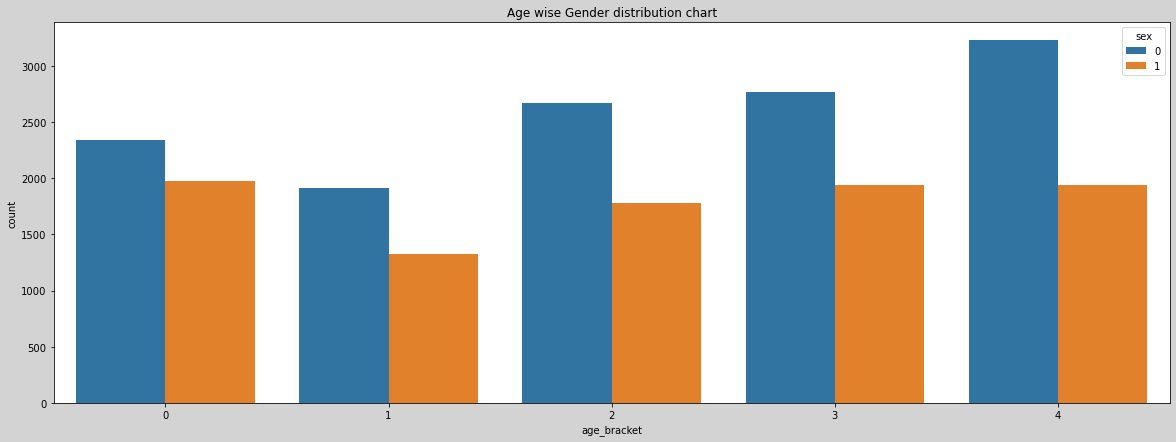

In [27]:
plt.figure(figsize=(20,7),facecolor="lightgrey",frameon=True,edgecolor='blue')
#sns.countplot(mydata_liver.Total_Protiens)
sns.countplot(x="age_bracket",data=mydata,hue='sex')
plt.title("Age wise Gender distribution chart")

# Declaring dependent and independent variables

In [30]:
y_dep = mydata.h1n1_vaccine

In [31]:
x_ind = mydata.drop("h1n1_vaccine",axis=1)

# Importing Test Train and Fitting the model

In [33]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=1)

In [35]:
import statsmodels.api as sm

In [36]:
model_stats=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.420540
         Iterations 6


In [37]:
model_stats.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.197     
Dependent Variable:    h1n1_vaccine        AIC:                 14786.2721
Date:                  2021-09-01 11:39    BIC:                 15034.9180
No. Observations:      17504               Log-Likelihood:      -7361.1   
Df Model:              31                  LL-Null:             -9167.1   
Df Residuals:          17472               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
unique_id                 -0.0000   0.0000  -7.7210 0.0000 -0.0000 -0.0000
h1n1_worry                -0.1326   0.0284  -4.6676 0.0000 -0.1882 -0.0769
h1n1_awareness            -0.0917   0.0365  -2.5092 0.0121 -0.1633 -0.0201
antiviral_medication       0.1358   0.0948   1.4337 0.1517 -0.0499  0.3216
contact_avoidance         -0.1269   0.0520  -2.4406 0.0147 -0.2288 -0.0250
bought_face_mask           0.1908   0.0808   2.3617 0.0182  0.0325  0.3492
wash_hands_frequently     -0.3916   0.0622  -6.2957 0.0000 -0.5135 -0.2697
avoid_large_gatherings    -0.1791   0.0555  -3.2261 0.0013 -0.2879 -0.0703
reduced_outside_home_cont -0.0265   0.0565  -0.4683 0.6396 -0.1373  0.0843
avoid_touch_face          -0.0343   0.0509  -0.6738 0.5004 -0.1340  0.0654
dr_recc_h1n1_vacc          2.0485   0.0632  32.4362 0.0000  1.9247  2.1723
dr_recc_seasonal_vacc     -0.4415   0.0619  -7.1350 0.0000 -0.5628 -0.3202
chronic_medic_condition    0.1516   0.0477   3.1767 0.0015  0.0581  0.2451
cont_child_undr_6_mnths    0.1572   0.0720   2.1825 0.0291  0.0160  0.2984
is_health_worker           0.7704   0.0607  12.6863 0.0000  0.6513  0.8894
is_h1n1_vacc_effective     0.2598   0.0246  10.5754 0.0000  0.2116  0.3079
is_h1n1_risky              0.3877   0.0200  19.3511 0.0000  0.3485  0.4270
sick_from_h1n1_vacc       -0.0589   0.0187  -3.1454 0.0017 -0.0955 -0.0222
is_seas_vacc_effective    -0.1549   0.0231  -6.7133 0.0000 -0.2001 -0.1097
is_seas_risky              0.1768   0.0193   9.1443 0.0000  0.1389  0.2147
sick_from_seas_vacc       -0.1961   0.0187 -10.5030 0.0000 -0.2327 -0.1595
age_bracket               -0.0666   0.0178  -3.7420 0.0002 -0.1015 -0.0317
qualification             -0.1304   0.0194  -6.7169 0.0000 -0.1685 -0.0924
race                      -0.2561   0.0221 -11.5692 0.0000 -0.2995 -0.2127
sex                       -0.1684   0.0434  -3.8821 0.0001 -0.2534 -0.0834
income_level              -0.0353   0.0315  -1.1190 0.2631 -0.0971  0.0265
marital_status            -0.7206   0.0482 -14.9474 0.0000 -0.8151 -0.6261
housing_status            -0.3606   0.0555  -6.5026 0.0000 -0.4694 -0.2519
employment                -0.0631   0.0387  -1.6305 0.1030 -0.1389  0.0127
census_msa                -0.1003   0.0253  -3.9698 0.0001 -0.1498 -0.0508
no_of_adults              -0.3763   0.0332 -11.3441 0.0000 -0.4413 -0.3113
no_of_children            -0.2525   0.0264  -9.5822 0.0000 -0.3042 -0.2009
==========================================================================

"""

# Logsitic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [40]:
model1.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred=model1.predict(x_test)

In [42]:
y_pred #Machine predicted class values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
confusion_matrix(y_test,y_pred)

array([[3245,  183],
       [ 619,  329]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred) #(3245+329)/(3245+183+619+329)

0.81672760511883

# Performing ROC

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [48]:
logis_roc_auc = roc_auc_score(y_test,y_pred)

In [49]:
fpr,tpr,thresholds=roc_curve(y_test,model1.predict_proba(x_test)[:,1])

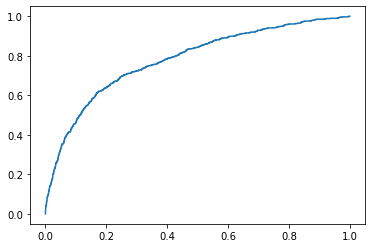

In [50]:
plt.plot(fpr,tpr,logis_roc_auc)

In [67]:
roc_t=LogisticRegression(class_weight="balanced")
roc_t.fit(x_train,y_train)
THRESHOLD=0.8

In [68]:
y_pred_roc=np.where(roc_t.predict_proba(x_test)[:,1]>THRESHOLD,1,0)

In [69]:
accuracy_score(y_test,y_pred_roc)

0.818327239488117

# The Logistic Regression accuracy score is 81.67% and the ROC accuracy score is 81.81% . 

# Classification Report

In [72]:
from sklearn.metrics import classification_report

In [73]:
c_Report=classification_report(y_test,y_pred_roc)

In [75]:
print(c_Report)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      3428
           1       0.67      0.32      0.43       948

    accuracy                           0.82      4376
   macro avg       0.75      0.64      0.66      4376
weighted avg       0.80      0.82      0.79      4376



# Logistic Regression Accuracy = 81.67%

# ROC Accuracy = 81.81%

# So we conclude that the overall accuracy of the dataset is about 82% 